In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D

In [3]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

print("X_train shape:",x_train.shape)

X_train shape: (60000, 28, 28)


In [4]:
# the data is only 2D
# Convulation expect the 3D data
import numpy as np
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:",x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [5]:
K = len(set(y_train))

print('Classes:',K)

Classes: 10


In [6]:
# Building the model
model = Sequential([
                    Input(shape=x_train[0].shape),
                    Conv2D(32, (3,3), strides=2, activation="relu"),
                    Conv2D(64, (3,3), strides=2, activation="relu"),
                    Conv2D(128, (3,3), strides=2, activation="relu"),
                    Flatten(),
                    Dropout(0.2),
                    Dense(512, activation="relu"),
                    Dropout(0.2),
                    Dense(units=K, activation='softmax')
])

#Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/2
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5222 - accuracy: 0.8073 - val_loss: 0.4056 - val_accuracy: 0.8468
Epoch 2/2
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3652 - accuracy: 0.8632 - val_loss: 0.3551 - val_accuracy: 0.8702


In [9]:
# Creating a data frame with loss, accuracy, val_loss, val_accuracy 
import pandas as pd
hist = pd.DataFrame(model.history.history)
hist.head()

,loss,accuracy,val_loss,val_accuracy
0,0.522248,0.807250,0.405604,0.8468
1,0.365162,0.863233,0.355075,0.8702


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [10]:
#Evaluating the model
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3551 - accuracy: 0.8702


[0.35507524013519287, 0.870199978351593]

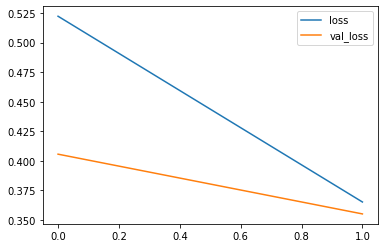

In [11]:
# Plotting the train loss and test loss
import matplotlib.pyplot as plt
plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()

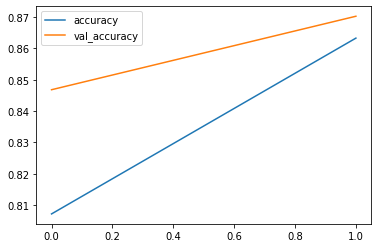

In [12]:
# Plotting the train and test accuracy
plt.plot(hist['accuracy'],label='accuracy')
plt.plot(hist['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[829   2  20  35   2   2 101   0   9   0]
 [  1 968   1  21   2   0   5   0   2   0]
 [ 15   2 788  11 104   0  78   0   2   0]
 [ 14   4  15 913  18   0  33   0   3   0]
 [  1   0  54  54 773   0 113   0   5   0]
 [  0   0   0   1   0 970   0  27   0   2]
 [145   1  94  32  99   0 610   0  19   0]
 [  0   0   0   0   0  22   0 967   0  11]
 [  0   1   6   2   4   8   6   5 967   1]
 [  1   0   0   0   0  20   0  62   0 917]]


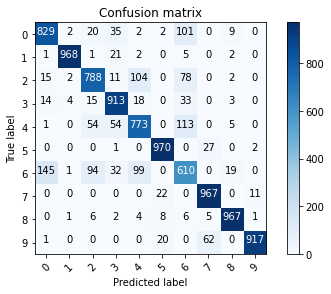

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [14]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

True label: Dress Predicted: Coat


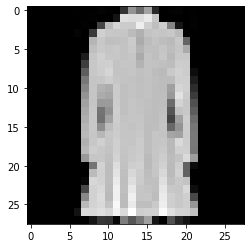

In [15]:
# Checking the image set that doesn't match
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
print("True label: %s Predicted: %s"%(labels[y_test[i]],labels[p_test[i]]))